In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats

In [69]:
hr_df = pd.read_csv('/content/HR.csv')

In [70]:
hr_df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [73]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_monthly_hours  14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [74]:
# проверка на наличие дубликатов (если значения во всех столбцах совпадают, то, скорее всего, это дублирующиеся строки)
duplicates = hr_df.duplicated()

In [75]:
clean_df = hr_df.drop_duplicates(keep='first')

In [76]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_monthly_hours  11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   Work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   department             11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


In [77]:
clean_df.describe()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [78]:
df_modes = clean_df.mode()

In [79]:
df_modes

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.74,0.55,4.0,149,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
df_median = clean_df.median(numeric_only=True)

In [81]:
df_median

satisfaction_level         0.66
last_evaluation            0.72
number_project             4.00
average_monthly_hours    200.00
time_spend_company         3.00
Work_accident              0.00
left                       0.00
promotion_last_5years      0.00
dtype: float64

In [82]:
hr_quant = clean_df.iloc[:, :5]

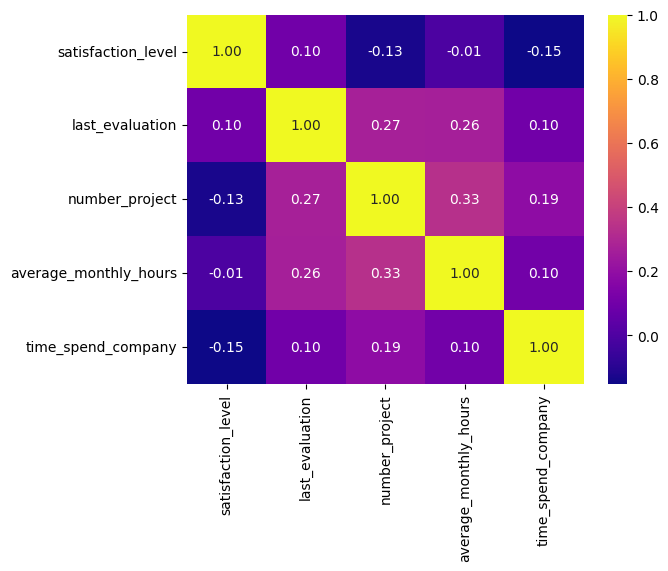

In [83]:
corr_matrix = hr_quant.corr()
sns.heatmap(corr_matrix, annot=True, cmap='plasma', fmt='.2f')
plt.show()

Самая высокая корреляция обнаруживается между количеством отработанных часов в месяц и количеством завершенных проектов за время работы (хотя данная корреляция незначительна). Наименьшая корреляция наблюдается между средним количеством часов в месяц и уровнем удовлетворенности работой.

In [84]:
# число сотрудников в каждом департаменте

dept_staff_count = clean_df.groupby('department')['satisfaction_level'].count()
dept_staff_count

department
IT              976
RandD           694
accounting      621
hr              601
management      436
marketing       673
product_mng     686
sales          3239
support        1821
technical      2244
Name: satisfaction_level, dtype: int64

In [85]:
# распределние сотрудников по зарплатам

fig = px.bar(clean_df['salary'].value_counts().reset_index(),
             x='index', y='salary',
             labels={'salary': 'Number of employees', 'index': 'Salary level'},
             color='index',
             title='Salary distribution - all departments',
             color_discrete_sequence=['yellow', 'gold', 'orange']
            )

fig.show()

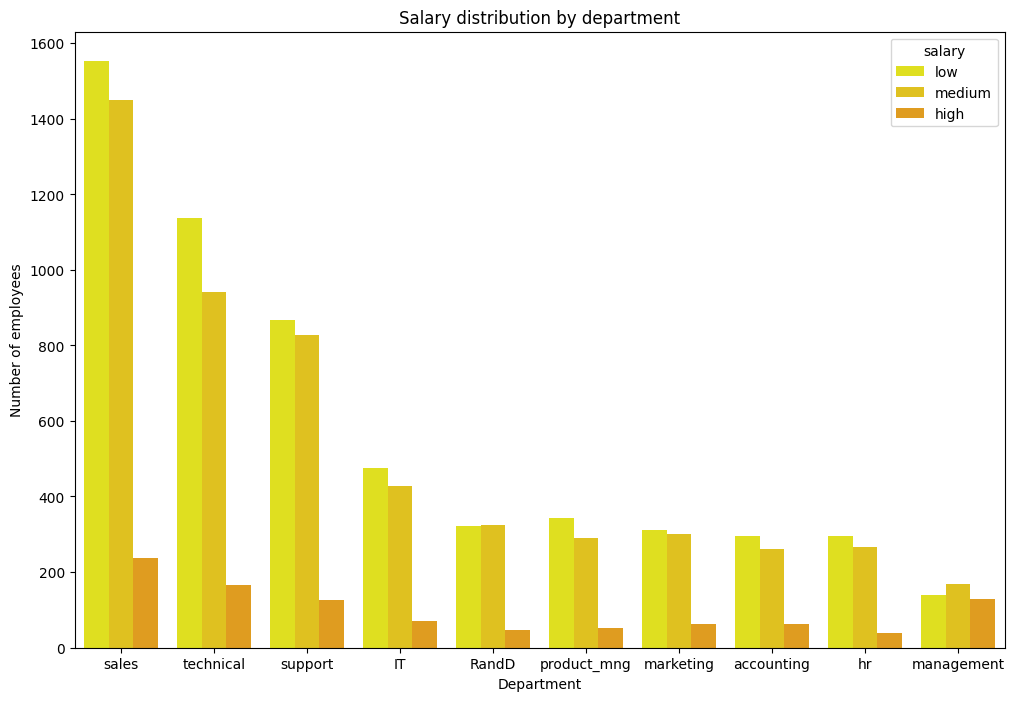

In [86]:
# распределение зарплат по департаментам

colors = {'low': 'yellow', 'medium': 'gold', 'high': 'orange'}
plt.figure(figsize=(12, 8))
sns.countplot(x='department', hue='salary', data=clean_df, order=clean_df['department'].value_counts().index, palette=colors)
plt.title('Salary distribution by department')
plt.xlabel('Department')
plt.ylabel('Number of employees')
plt.show()


В большинстве департаментов у сотрудников наблюдается низкий уровень заработной платы, за исключением отделов R&D и management, где у большей части персонала средний уровень заработной платы.

In [91]:
# проверка гипотезы
# H0: среднее количество часов в месяц не отличается у сотрудников с высокой и низкой зарплато
# разделим данные по salary: high - low

high = clean_df[clean_df['salary'] == 'high']['average_monthly_hours']
low = clean_df[clean_df['salary'] == 'low']['average_monthly_hours']

In [106]:
# проверка на нормальность распределния

def check(data):
    # используем тест Шапиро-Уилка
    stat, p_value = stats.shapiro(data)
    alpha = 0.05
    if p_value < alpha:
        print("Данные распределены не нормально")
    else:
        print("Данные распределены нормально")

check(high)
check(low)


Данные распределены не нормально
Данные распределены не нормально


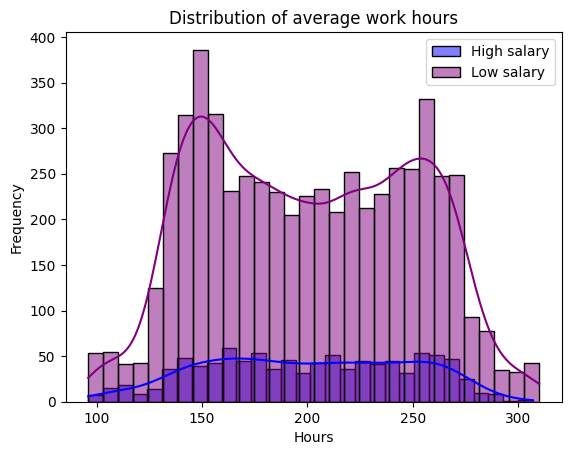

In [104]:
# на всякий случай, выполним проверку визуально - в нашем случае, из-за большого количества данных (high > 5000) p-value может быть неточным

sns.histplot(high, bins=30, kde=True, label='High salary', color='blue')
sns.histplot(low, bins=30, kde=True, label='Low salary', color='purple')
plt.title('Distribution of average work hours')
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Распределения отличаются от нормальных, особенно в случае low salary.

In [107]:
# проверка дисперсий, alpha = 0.05

stat_levene, p_value_levene = stats.levene(high, low)
if p_value_levene < 0.05:
  print('Дисперсии отличаются')
else:
  print('Дисперсии не отличаются')

Дисперсии отличаются


Поскольку данные имеют ненормальное распределение с различными значениями дисперсии и объемами выборок, будем использовать U-критерий Манна-Уитни для проверки гипотезы.

In [108]:
from scipy.stats import mannwhitneyu

statistic, p_value_mann = mannwhitneyu(high, low)

if p_value_mann < 0.05:
  print('Отклоняем нулевую гипотезу')
else:
  print('Не отклоняем нулевую гипотезу')


Не отклоняем нулевую гипотезу


Можно сделать вывод, что среднее количество часов НЕ отличается у сотрудников с высокой и низкой зарплатами.

In [109]:
# разделим данные на уволившихся и не уволившися сотрудников

left = clean_df[clean_df['left'] == 1]
stayed = clean_df[clean_df['left'] == 0]

In [110]:
# доля сотрудников с повышением за последние 5 лет
left_promotion = left['promotion_last_5years'].value_counts(normalize=True) * 100
stayed_promotion = stayed['promotion_last_5years'].value_counts(normalize=True) * 100

print(left_promotion)
print(stayed_promotion)

0    99.598192
1     0.401808
Name: promotion_last_5years, dtype: float64
0    98.05
1     1.95
Name: promotion_last_5years, dtype: float64


Среди уволившихся, доля сотрудников с повышением ~ 0.4. Среди не уволившихся, доля сотрудников с повышением 1.95.

In [112]:
# средняя степень удовлетворенности

left_satisfaction = left['satisfaction_level'].mean()
stayed_satisfaction = stayed['satisfaction_level'].mean()

print(left_satisfaction)
print(stayed_satisfaction)

0.440271220492215
0.667365


In [114]:
# среднее количество проектов

left_projects = left['number_project'].mean()
stayed_projects = stayed['number_project'].mean()

print(left_projects)
print(stayed_projects)

3.8834756403817177
3.7868


In [116]:
# построение LDA - модели

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split

In [141]:
len(left)

1991

In [140]:
len(stayed)

10000

В наборе данных намного больше значений 0 (stayed), что указывает на дисбаланс данных и может оказать влияние на точность модели LDA.

In [131]:
lda = LinearDiscriminantAnalysis()

lda_df = clean_df.drop(['department', 'salary'], axis=1)

In [132]:
X = lda_df.drop('left', axis=1)
y = lda_df['left']

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [134]:
lda = LinearDiscriminantAnalysis()

lda.fit(X_train, y_train)

y_pred = lda.predict(X_test)

In [135]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [136]:
asccuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [137]:
print(f"Accuracy score: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Accuracy score: 0.83

Confusion Matrix:
[[1901   97]
 [ 309   92]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      1998
           1       0.49      0.23      0.31       401

    accuracy                           0.83      2399
   macro avg       0.67      0.59      0.61      2399
weighted avg       0.80      0.83      0.80      2399



Несмотря на то, что общий accuracy score достаточно высокий, модель демострирует низкую точность для класса '1' (left). Это может быть обусловлено дисбалансом классов в наборе данных.

In [146]:
# используем resampling, чтобы уменьшить влияние несбалансированных данных

from imblearn.under_sampling import RandomUnderSampler

randus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = randus.fit_resample(X_train, y_train)

lda.fit(X_resampled, y_resampled)

y_pred_2 = lda.predict(X_test)

accuracy_2 = accuracy_score(y_test, y_pred_2)
conf_matrix_2 = confusion_matrix(y_test, y_pred_2)
classification_rep_2 = classification_report(y_test, y_pred_2)

print(f"Accuracy score: {accuracy_2:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix_2)
print("\nClassification Report:")
print(classification_rep_2)

Accuracy score: 0.78

Confusion Matrix:
[[1533  465]
 [  51  350]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.77      0.86      1998
           1       0.43      0.87      0.58       401

    accuracy                           0.78      2399
   macro avg       0.70      0.82      0.72      2399
weighted avg       0.88      0.78      0.81      2399



В случае с использованием resampling, повышается точность предсказания класса '1' (left) по сравнению с предыдущей моделью, однако, также повысилось число false positives для класса '0' (stayed). Если исходить из показателей macro average, weighted average и F1 score, то, в целом, вторая модель является более точной.